<a href="https://colab.research.google.com/github/Quantum-Intelligence-Frontier/dldna/blob/main/notebooks/zh/part_1/03_深度学习框架.ipynb" target="_parent">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="在Colab中打开"/>
</a>

# 3. 深度学习框架

> "工具与制造它的工匠一样出色。" - *匿名，但经常被引用为冯·诺伊曼*

在深度学习的历史中，框架的发展是非常重要的。自2012年AlexNet成功之后，各种框架相继出现。经过Caffe、Theano、Torch7等阶段，目前主要是PyTorch和TensorFlow占据了主流。

2010年代初，深度学习开始在图像识别、语音识别等多个领域展现出超越现有技术的惊人成果。然而，训练和部署深度学习模型仍然是一个难题。因为需要直接实现神经网络构建、梯度计算、GPU加速等。这种复杂性提高了进入深度学习研究的门槛，并减缓了研究速度。为此，出现了深度学习框架，提供了用于构建、训练和部署神经网络模型的高级API和工具，简化并加速了开发过程。最初出现的是Theano、Caffe、Torch等框架，在学术界和工业界得到了广泛应用。

2015年，谷歌将TensorFlow开源，给深度学习框架生态系统带来了重大变化。TensorFlow凭借灵活的架构、强大的可视化工具、大规模分布式训练支持等功能迅速获得 popularity。2017年，Facebook发布了PyTorch，树立了另一个重要的里程碑。PyTorch提供了动态计算图、直观的接口和出色的调试功能，在研究者中迅速普及。

目前，深度学习框架已经不仅仅是一个简单的工具，而是成为了深度学习研究和开发的核心基础设施。它们提供自动微分、GPU加速、模型并行化、分布式训练等核心功能，加速了新模型和算法的发展。此外，不同框架之间的竞争与合作也在推动着深度学习生态系统的进一步发展。

## 3.1 PyTorch

PyTorch 是基于 Torch 库的开源机器学习框架，用于计算机视觉和自然语言处理等应用。2016年，Facebook的人工智能研究实验室（FAIR）将Torch7用Python重新实现，并开发为核心框架。由于动态计算图和直观的调试功能，它在研究者中迅速受欢迎。尽管还有TensorFlow、JAX、Caffe等其他框架，但PyTorch已经成为了研究领域的事实标准。许多新模型通常与PyTorch实现一起发布。

熟悉一个框架后，利用另一个框架的优势也是一个好策略。例如，可以将TensorFlow的数据预处理管道或JAX的功能转换功能与PyTorch结合使用。

In [ ]:
!pip install dldna[colab] # in Colab
# !pip install dldna[all] # in your local

In [1]:
import torch

# Print PyTorch version
print(f"PyTorch version: {torch.__version__}")

# Set the random seed for reproducibility
torch.manual_seed(7)

PyTorch version: 2.6.0+cu124


在生成随机数时，设置初始种子值可以每次都获得相同的随机数。这是为了在重复的训练中保证一致的结果，研究中经常使用这种方法。

### 3.1.1 张量对象

> **挑战任务**: 如何利用GPU高效地进行大规模矩阵运算？
>
> **研究者的苦恼**: 随着深度学习模型的规模增大，仅使用CPU进行训练和推理所需的时间变得非常长。虽然GPU在并行计算方面具有优势，适合深度学习，但GPU编程复杂且困难。为了使深度学习研究人员更容易利用GPU，需要一种工具来抽象化和自动化GPU运算。

张量是PyTorch的基本数据结构。自2006年CUDA出现以来，GPU运算成为了深度学习的核心，而张量则被设计用于高效地执行这些GPU运算。张量是一般的多维数组，它概括了标量、向量和矩阵。在深度学习中，数据的维度（张量秩）非常多样。例如，图像表示为(批次, 通道, 高度, 宽度)的四维张量，而自然语言则表示为(批次, 序列长度, 嵌入维度)的三维张量。正如我们在第2章所讨论的那样，能够灵活地变换和处理这些维度非常重要。

可以如下声明张量：

| 属性 | 描述 |
| --- | --- |
| `torch.tensor(data)` | 从数据创建一个张量 |
| `torch.zeros(size)` | 创建一个全为0的张量 |
| `torch.ones(size)` | 创建一个全为1的张量 |
| `torch.rand(size)` | 创建一个在[0, 1)区间内的随机值张量 |

```python
import torch

# 从列表创建张量
a = torch.tensor([[1, 2], [3, 4]])
print(a)

# 创建全为0的张量
b = torch.zeros((2, 3))
print(b)

# 创建全为1的张量
c = torch.ones((2, 3))
print(c)

# 创建随机值张量
d = torch.rand((2, 3))
print(d)
```

In [2]:
import numpy as np
import torch

# Create a 3x2x4 tensor with random values
a = torch.Tensor(3, 2, 4)
print(a)

tensor([[[ 1.1210e-44,  0.0000e+00,  0.0000e+00,  4.1369e-41],
         [ 1.8796e-17,  0.0000e+00,  2.8026e-45,  0.0000e+00]],

        [[ 0.0000e+00,  0.0000e+00,         nan,         nan],
         [ 6.3058e-44,  4.7424e+30,  1.4013e-45,  1.3563e-19]],

        [[ 1.0089e-43,  0.0000e+00,  1.1210e-44,  0.0000e+00],
         [-8.8105e+09,  4.1369e-41,  1.8796e-17,  0.0000e+00]]])


可以从现有数据初始化张量。

In [4]:
# From a Python list
d = [[1, 2], [3, 4]]
print(f"Type of d: {type(d)}")

a = torch.Tensor(d)  # Creates a *copy*
print(f"Tensor a:\n{a}")
print(f"Type of a: {type(a)}")

# From a NumPy array
d_np = np.array(d)
print(f"Type of d_np: {type(d_np)}")

b = torch.from_numpy(d_np) # Shares memory with d_np (zero-copy)
print(f"Tensor b (from_numpy):\n{b}")


c = torch.Tensor(d_np)  # Creates a *copy*
print(f"Tensor c (from np array using torch.Tensor):\n{c}")

# Example of memory sharing with torch.from_numpy
d_np[0, 0] = 100
print(f"Modified d_np:\n{d_np}")
print(f"Tensor b (from_numpy) after modifying d_np:\n{b}")
print(f"Tensor c (copy) after modifying d_np:\n{c}")

Type of d: <class 'list'>
Tensor a:
tensor([[1., 2.],
        [3., 4.]])
Type of a: <class 'torch.Tensor'>
Type of d_np: <class 'numpy.ndarray'>
Tensor b (from_numpy):
tensor([[1, 2],
        [3, 4]])
Tensor c (from np array using torch.Tensor):
tensor([[1., 2.],
        [3., 4.]])
Modified d_np:
[[100   2]
 [  3   4]]
Tensor b (from_numpy) after modifying d_np:
tensor([[100,   2],
        [  3,   4]])
Tensor c (copy) after modifying d_np:
tensor([[1., 2.],
        [3., 4.]])


输出相同并不意味着是相同的对象。`d` 是 Python 列表对象，而张量可以从各种数据结构中创建。特别是与 NumPy 数组的交互非常高效。然而，列表对象和 NumPy 数组不支持 GPU，因此对于大规模运算，转换为张量是必要的。*重要的是* 理解 `torch.Tensor(data)` 和 `torch.from_numpy(data)` 之间的区别。前者 *总是* 创建一个副本，而后者创建一个与原 NumPy 数组共享内存的 *视图*（如果可能的话 - 零拷贝）。修改 NumPy 数组也会改变通过 `from_numpy` 创建的张量，反之亦然。

初始化张量的方法非常多样。2006 年 Hinton 的论文之后，初始化方法的重要性得到了强调，并且开发了各种初始化策略。最基本的初始化函数如下：

*   `torch.zeros`: 用 0 初始化。
*   `torch.ones`: 用 1 初始化。
*   `torch.rand`: 从 0 和 1 之间的均匀分布中随机数初始化。
*   `torch.randn`: 从标准正态分布（均值 0，方差 1）中随机数初始化。
*   `torch.arange`: 按 n, n+1, n+2, ... 的顺序初始化。

In [5]:
shape = (2, 3)

rand_t = torch.rand(shape)     # Uniform distribution [0, 1)
randn_t = torch.randn(shape)   # Standard normal distribution
ones_t = torch.ones(shape)
zeros_t = torch.zeros(shape)

print(f"Random tensor (uniform):\n{rand_t}")
print(f"Random tensor (normal):\n{randn_t}")
print(f"Ones tensor:\n{ones_t}")
print(f"Zeros tensor:\n{zeros_t}")

Random tensor (uniform):
tensor([[0.5349, 0.1988, 0.6592],
        [0.6569, 0.2328, 0.4251]])
Random tensor (normal):
tensor([[-1.2514, -1.8841,  0.4457],
        [-0.7068, -1.5750, -0.6318]])
Ones tensor:
tensor([[1., 1., 1.],
        [1., 1., 1.]])
Zeros tensor:
tensor([[0., 0., 0.],
        [0., 0., 0.]])


PyTorch 支持 100 多种张量运算，这些都可以在 GPU 上运行。张量默认是在 CPU 内存中创建的，因此如果要使用 GPU，则需要使用 `to()` 函数显式地进行移动。在 CPU 和 GPU 之间移动大型张量会产生相当大的成本，因此谨慎的内存管理是必不可少的。在实际的深度学习训练中，GPU 的内存带宽对性能有决定性的影响。例如，在训练变压器模型时，GPU 内存越大，可以使用更大的批处理大小，从而提高训练效率。然而，高带宽内存的生产成本非常高，占 GPU 价格的很大一部分。CPU 和 GPU 张量运算的性能差异在矩阵乘法等可并行化的运算中尤为显著。正因为如此，在现代深度学习中，GPU、TPU、NPU 等专用加速器是必不可少的。

In [6]:
# Device setting
if torch.cuda.is_available():
    tensor = zeros_t.to("cuda")
    device = "cuda:0"
else:
    device = "cpu"
    print('GPU not available')

# CPU/GPU performance comparison
import time

# CPU operation
x = torch.rand(10000, 10000)
start = time.time()
torch.matmul(x, x)
cpu_time = time.time() - start
print(f"CPU computation time = {cpu_time:3.2f} seconds")

# GPU operation
if device != "cpu":
    x = x.to(device)
    start = torch.cuda.Event(enable_timing=True)
    end = torch.cuda.Event(enable_timing=True)

    start.record()
    torch.matmul(x, x)
    end.record()
    torch.cuda.synchronize()  # Wait for all operations to complete
    gpu_time = start.elapsed_time(end) / 1000  # Convert milliseconds to seconds
    print(f"GPU computation time = {gpu_time:3.2f} seconds")
    print(f"GPU is {cpu_time / gpu_time:3.1f} times faster.")

CPU computation time = 2.34 seconds
GPU computation time = 0.14 seconds
GPU is 16.2 times faster.


NumPy和张量之间的转换实现得非常高效。特别是，如上所述，使用`torch.from_numpy()`可以在不进行内存复制的情况下共享内存。

In [7]:
np_a = np.array([[1, 1], [2, 3]])
tensor_a = torch.from_numpy(np_a)
np_b = tensor_a.numpy() # Shares memory.  If tensor_a is on CPU.

print(f"NumPy array: {np_a}")
print(f"Tensor: {tensor_a}")
print(f"NumPy array from Tensor: {np_b}") #if tensor_a is on CPU.

NumPy array: [[1 1]
 [2 3]]
Tensor: tensor([[1, 1],
        [2, 3]])
NumPy array from Tensor: [[1 1]
 [2 3]]


在将张量转换为NumPy时，张量必须位于CPU上。如果张量在GPU上，则必须先使用`.cpu()`将其移动到CPU上。张量的基本属性是`shape`、`dtype`和`device`，通过这些属性可以查看张量的形状和存储位置。

In [18]:
a = torch.rand(2, 3)
print(f"Shape = {a.shape}")
print(f"Data type = {a.dtype}")
print(f"Device = {a.device}")

Shape = torch.Size([2, 3])
Data type = torch.float32
Device = cpu


索引和切片使用与NumPy相同的语法。

In [19]:
a = torch.rand(3, 3)
print(f"Tensor a:\n{a}")
print(f"First row: {a[0]}")
print(f"First column: {a[:, 0]}")
print(f"Last column: {a[..., -1]}")  # Equivalent to a[:, -1]

Tensor a:
tensor([[0.2069, 0.8296, 0.4973],
        [0.9265, 0.8386, 0.6611],
        [0.5329, 0.7822, 0.0975]])
First row: tensor([0.2069, 0.8296, 0.4973])
First column: tensor([0.2069, 0.9265, 0.5329])
Last column: tensor([0.4973, 0.6611, 0.0975])


### 3.1.2 运算

PyTorch 支持 NumPy 的几乎所有运算。自 1964 年 APL 语言开始的多维数组运算传统，已经从 NumPy 延续到了 PyTorch。可以在 PyTorch 官方文档([PyTorch documentation]([https://pytorch.org/docs/stable/tensors.html))中查看支持的所有运算列表。

张量形状的改变是神经网络中最常用的运算之一。通过 `view()` 函数可以更改张量的维度，同时必须保持元素总数不变。`permute()` 函数用于重新排列维度顺序。

In [20]:
a = torch.arange(12)
print(f"a: {a}")

x = a.view(3, 4)  # Reshape to 3x4
print(f"x: {x}")

y = x.permute(1, 0)  # Swap dimensions 0 and 1
print(f"y: {y}")

b = torch.randn(2, 3, 5)
print(f"b shape: {b.shape}")

z = b.permute(2, 0, 1)  # Change dimension order to (2, 0, 1)
print(f"z shape: {z.shape}")

a: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
x: tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
y: tensor([[ 0,  4,  8],
        [ 1,  5,  9],
        [ 2,  6, 10],
        [ 3,  7, 11]])
b shape: torch.Size([2, 3, 5])
z shape: torch.Size([5, 2, 3])


矩阵运算是深度学习的核心，PyTorch提供了多种矩阵运算函数。

1.  `torch.matmul`: 执行一般的矩阵运算。根据维度的不同，它的工作方式如下：
    *   一维 × 一维: 内积(dot product)
    *   二维 × 二维: 矩阵乘法
    *   一维 × 二维: 在第一个张量上增加一个维度后进行矩阵乘法
    *   N维 × M维: 广播后进行矩阵乘法
2.  `torch.mm`: 纯粹的矩阵乘法运算（不支持广播）
3.  `torch.bmm`: 包含批处理维度的矩阵乘法 ((b, i, k) × (b, k, j) → (b, i, j))
4.  `torch.einsum`: 使用爱因斯坦求和约定进行张量运算。可以简洁地表示复杂的张量运算。（详情参见“理论深入”）
    -   `torch.einsum('ij,jk->ik', a, b)`: 矩阵a和b的乘积

In [21]:
a = torch.arange(6)
b = torch.arange(12)

X = a.view(2, 3)
Y = b.view(3, 4)
print(f"X: {X}")
print(f"Y: {Y}")

# matmul (2,3) X (3,4) -> (2, 4)
print(f"X @ Y = {torch.matmul(X, Y)}")

# Using torch.einsum for matrix multiplication
einsum_result = torch.einsum('ij,jk->ik', X, Y)
print(f"X @ Y (using einsum) = {einsum_result}")


a = torch.arange(2)
b = torch.arange(2)
print(f"a: {a}")
print(f"b: {b}")

# Vector x Vector operation
print(f"a @ b = {torch.matmul(a, b)}")

# 1D tensor (vector), 2D tensor (matrix) operation
# (2) x (2,2) is treated as (1,2) x (2,2) for matrix multiplication.
# Result: (1,2) x (2,2) -> (1,2)
b = torch.arange(4)
B = b.view(2, 2)
print(f"a: {a}")
print(f"B: {B}")
print(f"a @ B = {torch.matmul(a, B)}")

# Matrix x Vector operation
X = torch.randn(3, 4)
b = torch.randn(4)
print(f"X @ b shape = {torch.matmul(X, b).size()}")

# Batched matrix x Batched matrix
# The leading batch dimension is maintained.
# The 2nd and 3rd dimensions are treated as matrices for multiplication.
X = torch.arange(18).view(3, 2, 3)
Y = torch.arange(18).view(3, 3, 2)
print(f"X: {X}")
print(f"Y: {Y}")
# Batch dimension remains the same, and (2,3)x(3,2) -> (2,2)
print(f"X @ Y shape: {torch.matmul(X, Y).size()}")
print(f"X @ Y: {torch.matmul(X, Y)}")

# Batched matrix x Broadcasted matrix
X = torch.arange(18).view(3, 2, 3)
Y = torch.arange(6).view(3, 2)
print(f"X: {X}")
print(f"Y: {Y}")
# The second matrix lacks a batch dimension.
# It's broadcasted to match the batch dimension of the first matrix (repeated 3 times).
print(f"X @ Y shape: {torch.matmul(X, Y).size()}")
print(f"X @ Y: {torch.matmul(X, Y)}")


# Using torch.einsum for matrix multiplication
X = torch.arange(6).view(2, 3)
Y = torch.arange(12).view(3, 4)
einsum_result = torch.einsum('ij,jk->ik', X, Y)  # Equivalent to torch.matmul(X, Y)
print(f"X @ Y (using einsum) = {einsum_result}")

X: tensor([[0, 1, 2],
        [3, 4, 5]])
Y: tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
X @ Y = tensor([[20, 23, 26, 29],
        [56, 68, 80, 92]])
X @ Y (using einsum) = tensor([[20, 23, 26, 29],
        [56, 68, 80, 92]])
a: tensor([0, 1])
b: tensor([0, 1])
a @ b = 1
a: tensor([0, 1])
B: tensor([[0, 1],
        [2, 3]])
a @ B = tensor([2, 3])
X @ b shape = torch.Size([3])
X: tensor([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 9, 10, 11]],

        [[12, 13, 14],
         [15, 16, 17]]])
Y: tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])
X @ Y shape: torch.Size([3, 2, 2])
X @ Y: tensor([[[ 10,  13],
         [ 28,  40]],

        [[172, 193],
         [244, 274]],

        [[550, 589],
         [676, 724]]])
X: tensor([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 

`torch.einsum` 使用爱因斯坦求和约定来表示张量运算。`'ij,jk->ik'` 表示将 `X` 张量的 `(i, j)` 维与 `Y` 张量的 `(j, k)` 维相乘，生成 `(i, k)` 维的结果。这与矩阵乘法 `torch.matmul(X, Y)` 产生相同的结果。`einsum` 还支持其他多种运算，包括转置、求和、内积、外积、批矩阵乘等。更多详细信息请参阅 PyTorch 文档。

In [22]:
# Other einsum examples

# Transpose
a = torch.randn(2, 3)
b = torch.einsum('ij->ji', a)  # Swap dimensions

# Sum of all elements
a = torch.randn(2, 3)
b = torch.einsum('ij->', a)  # Sum all elements

# Batch matrix multiplication
a = torch.randn(3, 2, 5)
b = torch.randn(3, 5, 3)
c = torch.einsum('bij,bjk->bik', a, b) # Batch matrix multiplication

::: {.callout-note collapse="true" title="点击查看内容（深入探讨：爱因斯坦求和约定与torch.einsum）"}
## 爱因斯坦记号法与 torch.einsum

### 爱因斯坦记号法 (Einstein Notation)

爱因斯坦记号法（Einstein Notation，或 Einstein Summation Convention）是阿尔伯特·爱因斯坦在1916年描述广义相对论时引入的一种记号法。最初是为了简洁地表示物理学中的公式，尤其是相对论的公式而设计的，但由于其便利性和表达力，在处理张量运算的各种领域中得到了广泛应用。

**核心思想:**

  * **重复的索引表示求和:** 在一个项（term）中相同的索引出现两次时，暗示对该索引的所有可能值进行求和(summation)，省略显式的求和符号($\sum$)以简化记号。
  * **自由索引与哑索引:**
      * **自由索引 (free index):** 出现在结果张量中的索引。在每个项中仅出现一次。
      * **哑索引 (dummy index):** 被求和的索引。在一个项中出现两次。(summation index, bound index)

**基本规则**

1.  **如果一个索引在同一项中出现两次，则对该索引进行求和。**
2.  **自由索引决定了结果张量的维度。**
3.  **哑索引仅用于内部计算，不显示在结果中。**
4.  **索引字符可以任意选择，但为了防止混淆，最好保持一致性**。（通常使用$i, j, k, l, m, n$等）
5.  **箭头($\rightarrow$)的左边**表示输入张量，**右边**表示输出张量。

**示例**

  * **向量点积 (dot product):** $a_i b_i$ ($\sum_i a_i b_i$ 的同义词)
  * **矩阵乘法 (matrix multiplication):** $A_{ij} B_{jk} = C_{ik}$ ($\sum_j A_{ij}B_{jk}$ 的同义词)
  * **转置 (transpose):** $A_{ij} = B_{ji}$ （B 是 A 的转置矩阵）
  * **迹 (trace):** $A_{ii}$ ($\sum_i A_{ii}$ 的同义词)
  * **外积 (outer product):** $a_i b_j = C_{ij}$
  * **元素乘法(element-wise multiplication):** $A_{ij}B_{ij} = C_{ij}$ （Hadamard 积）

**深度学习中的应用示例**
* **批处理矩阵乘法 (batched matrix multiplication):** $A_{bij} B_{bjk} = C_{bik}$ ($b$: 批次维度)
  * **注意力机制 (attention mechanism):** $e_{ij} = Q_{ik} K_{jk}$, $a_{ij} = \text{softmax}(e_{ij})$, $v_{i} = a_{ij} V_{j}$ ($Q$: 查询, $K$: 键, $V$: 值)
  * **双线性变换 (bilinear transformation):** $x_i W_{ijk} y_j = z_k$
  * **多维卷积 (convolution):** $I_{b,c,i,j} * F_{o,c,k,l} = O_{b,o,i',j'}$ ($b$: 批次, $c$: 输入通道, $o$: 输出通道, $i, j$: 输入空间维度, $k, l$: 滤波器空间维度)
  * **批归一化 (Batch Normalization):** $\gamma_c * \frac{x_{b,c,h,w} - \mu_c}{\sigma_c} + \beta_c$ ($c$: 通道维度, $b$: 批次, $h$: 高度, $w$: 宽度)
  * **RNN隐状态更新**: $h_t = \tanh(W_{ih}x_t + b_{ih} + W_{hh}h_{t-1} + b_{hh})$ ($h$: 隐藏, $x$: 输入, $W$: 权重, $b$: 偏置)
  * **LSTM单元状态更新**: $c_t = f_t * c_{t-1} + i_t * \tilde{c}_t$ ($c$: 单元状态, $f$: 遗忘门, $i$: 输入门, $\tilde{c}_t$: 候选单元状态)

### torch.einsum

`torch.einsum` 是 PyTorch 中使用爱因斯坦求和约定执行张量运算的函数。`einsum` 是 "Einstein summation" 的缩写。

**用法:**

```python
torch.einsum(equation, *operands)
```

  * `equation`: 爱因斯坦求和约定字符串，如 `'ij,jk->ik'`。
  * `*operands`: 参与运算的张量（可变参数）。

**优点**

  * **简洁性:** 复杂的张量运算可以用一行代码表示。
  * **可读性:** 爱因斯坦求和约定能清晰地表达张量运算的意义。
  * **灵活性:** 可以组合各种张量运算，轻松定义新运算。
  * **优化:** PyTorch 自动优化 `einsum` 运算，使其高效计算。（在某些情况下）可能比手动实现的运算更快。利用 BLAS、cuBLAS 等库的优化例程，或优化运算顺序。
  * **自动微分支持**: 使用 `einsum` 定义的运算与 PyTorch 的自动微分系统完全兼容。

**torch.einsum 示例:**

```python
import torch

# 矩阵乘法
A = torch.randn(3, 4)
B = torch.randn(4, 5)
C = torch.einsum('ij,jk->ik', A, B)  # C = A @ B

# 转置
A = torch.randn(3, 4)
B = torch.einsum('ij->ji', A)  # B = A.T

# 对角线和
A = torch.randn(3, 3)
trace = torch.einsum('ii->', A)  # trace = torch.trace(A)
```
# 批量矩阵乘法
A = torch.randn(2, 3, 4)
B = torch.randn(2, 4, 5)
C = torch.einsum('bij,bjk->bik', A, B) # C = torch.bmm(A, B)

# 外积
a = torch.randn(3)
b = torch.randn(4)
C = torch.einsum('i,j->ij', a, b) # C = torch.outer(a, b)

# 元素乘法
A = torch.randn(2,3)
B = torch.randn(2,3)
C = torch.einsum('ij,ij->ij', A, B) # C = A * B

# 双线性变换
x = torch.randn(3)
W = torch.randn(5, 3, 4)
y = torch.randn(4)
z = torch.einsum('i,ijk,j->k', x, W, y) # z_k = sum_i sum_j x_i * W_{ijk} * y_j

# 多维张量缩减
tensor = torch.randn(3, 4, 5, 6)
result = torch.einsum('...ij->...i', tensor)  # 对最后两个维度求和
```

**`torch.einsum` vs. 其他操作:**

| 操作                    | `torch.einsum`           | 其他方法                                   |
| :---------------------- | :----------------------- | :------------------------------------------ |
| 矩阵乘法                | `'ij,jk->ik'`           | `torch.matmul(A, B)` 或者 `A @ B`          |
| 转置                    | `'ij->ji'`           | `torch.transpose(A, 0, 1)` 或者 `A.T`        |
| 对角和                  | `'ii->'`              | `torch.trace(A)`                            |
| 批量矩阵乘法            | `'bij,bjk->bik'`        | `torch.bmm(A, B)`                           |
| 内积                    | `'i,i->'`              | `torch.dot(a, b)`                            |
| 外积                    | `'i,j->ij'`           | `torch.outer(a, b)`                          |
| 元素乘法                | `'ij,ij->ij'`          | `A * B`                                      |
| 张量缩减 (sum, mean 等) | `'ijk->i'` (示例)      | `torch.sum(A, dim=(1, 2))`                   |

**`torch.einsum` 的局限性**

  * **初始学习曲线:** 对于不熟悉爱因斯坦记号的用户，刚开始可能会有些困难。
  * **复杂操作的可读性:** 在非常复杂的操作情况下，`einsum` 字符串可能变得很长，反而降低了可读性。这种情况下，最好将操作分解为多个步骤或使用注释。
  * **无法表示所有操作:** `einsum` 基于线性代数操作，因此无法直接表示非线性操作（如：`max`, `min`, `sort`）或条件操作。在这种情况下，需要与其他 PyTorch 函数一起使用。

**`einsum` 优化 (`torch.compile`)**
`torch.compile` (PyTorch 2.0 及以上)可以进一步优化 `einsum` 操作。`compile` 通过 JIT（即时）编译分析代码，执行各种优化，例如融合张量操作、优化内存访问模式等。

```python
import torch
# 在 PyTorch 2.0 及以上版本中可用

@torch.compile
def my_einsum_function(a, b):
    return torch.einsum('ij,jk->ik', a, b)

# 首次调用时编译，之后调用时执行优化后的代码
result = my_einsum_function(torch.randn(10, 20), torch.randn(20, 30))

```

**结论:**

爱因斯坦表示法和 `torch.einsum` 是深度学习中表达和计算复杂张量操作的强大工具。虽然一开始可能有些陌生，但熟悉之后可以大大提高代码的可读性和效率。特别是在处理如变压器模型等涉及大量复杂张量操作的深度学习模型时，其价值尤为显著。与 `torch.compile` 一起使用时，性能可以进一步提升。

**参考:**

1.  **Einstein Notation:** [https://en.wikipedia.org/wiki/Einstein\_notation](https://www.google.com/url?sa=E&source=gmail&q=https://en.wikipedia.org/wiki/Einstein_notation)
2.  **`torch.einsum` documentation:** [https://pytorch.org/docs/stable/generated/torch.einsum.html](https://www.google.com/url?sa=E&source=gmail&q=https://pytorch.org/docs/stable/generated/torch.einsum.html)
3.  **A basic introduction to NumPy's einsum:** [https://ajcr.net/Basic-guide-to-einsum/](https://www.google.com/url?sa=E&source=gmail&q=https://ajcr.net/Basic-guide-to-einsum/)
4.  **Einsum is All You Need - Einstein Summation in Deep Learning:** [https://rockt.github.io/2018/04/30/einsum](https://www.google.com/url?sa=E&source=gmail&q=https://rockt.github.io/2018/04/30/einsum)
:::

### 3.1.3 计算图用于梯度计算

自动微分（Automatic Differentiation）自20世纪70年代开始研究，但在2015年后随着深度学习的发展而受到广泛关注。PyTorch通过动态计算图（dynamic computation graph）实现自动微分，这是我们在第2章中讨论的链式法则（chain rule）的实际实现。

PyTorch的自动微分可以在每个操作步骤中跟踪和存储梯度。为此，需要在张量上显式声明梯度跟踪。

In [23]:
a = torch.randn((2,))
print(f"a.requires_grad (default): {a.requires_grad}")  # False (default)

a.requires_grad_(True)  # In-place modification
print(f"a.requires_grad (after setting to True): {a.requires_grad}")  # True

# Declare during creation
x = torch.arange(2, dtype=torch.float32, requires_grad=True)
print(f"x.requires_grad (declared at creation): {x.requires_grad}")

a.requires_grad (default): False
a.requires_grad (after setting to True): True
x.requires_grad (declared at creation): True


例如，考虑以下简单的损失函数。 (参见图3-1, 旧版本)

$$y = \frac {1}{N}\displaystyle\sum_{i}^{N} \{(x_i - 1)^2 + 4) \}$$

对$x_i$的操作可以依次表示为$a_i = x_i - 1$, $b_i = a_i^2$, $c_i = b_i + 4$, $y = \frac{1}{N}\sum_{i=1}^{N} c_i$。

我们将对该表达式执行前向(forward)和后向(backward)操作。

In [24]:
a = x - 1
b = a**2
c = b + 4
y = c.mean()

print(f"y = {y}")

# Perform backward operation
y.backward()

# Print the gradient of x (x.grad)
print(f"x.grad = {x.grad}")

y = 4.5
x.grad = tensor([-1.,  0.])


每个步骤的梯度用公式计算如下。

$\frac{\partial a_i}{\partial x_i} = 1, \frac{\partial b_i}{\partial a_i} = 2 \cdot a_i, \frac{\partial c_i}{\partial b_i} = 1,  \frac{\partial y}{\partial c_i} = \frac{1}{N}$

因此，根据链式法则，

$\frac{\partial y}{\partial x_i} = \frac{\partial y}{\partial  c_i}\frac{\partial c_i}{\partial b_i}\frac{\partial b_i}{\partial a_i}\frac{\partial a_i}{\partial x_i} =  \frac{1}{N} \cdot 1 \cdot 2 \cdot a_i \cdot 1 = \frac{2}{N}a_i = \frac{2}{N}(x_i - 1)$

$x_i$ 在 \[0, 1] 内，且 N=2 (x 的元素个数)，因此 $\frac{\partial y}{\partial x_i}  = [-0.5, 0.5]$。这与 PyTorch 的自动求导结果一致。

PyTorch 实现了自 1970 年代以来研究的自动求导概念的现代版本。特别是计算图的动态生成和梯度跟踪功能非常有用。但有时需要禁用这些自动求导功能。

In [8]:
x = torch.randn(3, 4)
w = torch.randn(4, 2)
b = torch.randn(2)

# If gradient tracking is needed
z = torch.matmul(x, w) + b
z.requires_grad_(True)  # Can also be set using requires_grad_()
print(f"z.requires_grad: {z.requires_grad}")

# Disable gradient tracking method 1: Using 'with' statement
with torch.no_grad():
    z = torch.matmul(x, w) + b
    print(f"z.requires_grad (inside no_grad): {z.requires_grad}")

# Disable gradient tracking method 2: Using detach()
z_det = z.detach()
print(f"z_det.requires_grad: {z_det.requires_grad}")

z.requires_grad: True
z.requires_grad (inside no_grad): False
z_det.requires_grad: False


梯度跟踪禁用在以下情况下特别有用：

1.  **推理（Inference）时**：仅需要前向传播的情况下，可以节省内存和计算成本。
2.  **微调（Fine-tuning）**：仅更新特定参数而固定其余部分时使用。
3.  **性能优化**：反向传播会产生额外的内存和计算成本，因此在不需要的情况下禁用它。

特别是在大规模语言模型的微调中，通常会固定大多数参数并仅更新一部分，因此梯度跟踪的选择性激活是一个非常重要的功能。

### 3.1.4 数据加载

数据加载是深度学习的核心要素。直到20世纪初，各个研究团队还使用各自独立的数据处理方式，但自2009年ImageNet等大规模数据集的出现后，标准化数据加载系统的必要性变得明显。

PyTorch提供了两个核心类来分离数据处理和训练逻辑。

1.  `torch.utils.data.Dataset`: 提供对数据和标签的一致访问接口。需要实现 `__len__` 和 `__getitem__` 方法。
2.  `torch.utils.data.DataLoader`: 提供按批次(batch)高效加载数据的机制。通过包装 `Dataset` 来自动化生成小批量、混洗和并行数据加载等操作。

以下是一个使用狄利克雷(Dirichlet)分布生成随机数据的示例。

In [9]:
import torch.utils.data as data
import numpy as np

# Initialize with Dirichlet distribution
a = np.random.dirichlet(np.ones(5), size=2)
b = np.zeros_like(a)
# Generate label values
b = (a == a.max(axis=1)[:, None]).astype(int)

print(f"Data (a):\n{a}")
print(f"Labels (b):\n{b}")


# Create a custom Dataset class by inheriting from PyTorch's Dataset.
class RandomData(data.Dataset):
    def __init__(self, feature, length):
        super().__init__()
        self.feature = feature
        self.length = length
        self.generate_data()

    def generate_data(self):
        x = np.random.dirichlet(np.ones(self.feature), size=self.length)
        y = (x == x.max(axis=1)[:, None]).astype(int)  # One-hot encoding

        self.data = x  # numpy object
        self.label = y

    def __len__(self):
        return self.length

    def __getitem__(self, index):
        # Return data and label as torch tensors
        return torch.tensor(self.data[index], dtype=torch.float32), torch.tensor(self.label[index], dtype=torch.int64)


dataset = RandomData(feature=10, length=100)
print(f"Number of data samples = {len(dataset)}")
print(f"Data at index 0 = {dataset[0]}")
print(f"Data type = {type(dataset[0][0])}")

Data (a):
[[0.46073711 0.01119455 0.28991657 0.11259078 0.12556099]
 [0.07331166 0.43554042 0.1243009  0.13339224 0.23345478]]
Labels (b):
[[1 0 0 0 0]
 [0 1 0 0 0]]
Number of data samples = 100
Data at index 0 = (tensor([1.4867e-01, 1.6088e-01, 1.2207e-02, 3.6049e-02, 1.1054e-04, 8.1160e-02,
        2.9811e-02, 1.9398e-01, 4.9448e-02, 2.8769e-01]), tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 1]))
Data type = <class 'torch.Tensor'>


`DataLoader` 提供了多种用于批处理的功能。主要参数如下：

*   `batch_size`: 每批的样本数
*   `shuffle`: 数据顺序随机化（训练时通常设置为 `True`）
*   `num_workers`: 用于数据加载并行化的进程数
*   `drop_last`: 是否处理最后一个不完整批次 (如果为 True，则丢弃)

从 `Dataset` 中使用 `__getitem__` 读取数据，并将结果转换为张量对象。特别是，设置 `num_workers` 对于处理大规模图像或视频数据集时非常重要。然而，在小规模数据集中，单个进程可能更加高效。如果 `num_workers` 值设置得过大，则可能会产生额外的开销，因此找到合适的值很重要。（通常尝试核心数或者核心数 * 2 的值）。

In [10]:
data_loader = data.DataLoader(dataset, batch_size=4, shuffle=True, num_workers=0)

# Read one batch.
train_x, train_y = next(iter(data_loader))

print(f"1st batch training data = {train_x}, \n Data shape = {train_x.shape}")
print(f"1st batch label data = {train_y}, \n Data shape = {train_y.shape}")
print(f"1st batch label data type = {type(train_y)}")

1st batch training data = tensor([[3.3120e-02, 1.4274e-01, 9.7984e-02, 1.9628e-03, 6.8926e-02, 3.4525e-01,
         4.6966e-02, 6.0947e-02, 4.2738e-02, 1.5937e-01],
        [8.0707e-02, 4.9181e-02, 3.1863e-02, 1.4238e-02, 1.6089e-02, 1.7980e-01,
         1.7544e-01, 1.3465e-01, 1.6361e-01, 1.5442e-01],
        [4.2364e-02, 3.3635e-02, 2.0840e-01, 1.6919e-02, 4.5977e-02, 6.5791e-02,
         1.8726e-01, 1.0325e-01, 2.2029e-01, 7.6117e-02],
        [1.4867e-01, 1.6088e-01, 1.2207e-02, 3.6049e-02, 1.1054e-04, 8.1160e-02,
         2.9811e-02, 1.9398e-01, 4.9448e-02, 2.8769e-01]]), 
 Data shape = torch.Size([4, 10])
1st batch label data = tensor([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]), 
 Data shape = torch.Size([4, 10])
1st batch label data type = <class 'torch.Tensor'>


PyTorch提供了针对特定领域数据处理的专用包。自2016年以来，随着深度学习在各个领域的扩展，对各领域特化数据处理的需求日益凸显。

*   `torchvision`: 计算机视觉
*   `torchaudio`: 音频处理
*   `torchtext`: 自然语言处理

Fashion-MNIST是2017年Zalando Research发布的数据集，旨在替代MNIST。该数据集的构成如下。

*   训练数据: 60,000个
*   测试数据: 10,000个
*   图像尺寸: 28x28灰度

Train data mean: tensor([0.2860]), std: tensor([0.3530])
Label: 5
Label map: Sandal


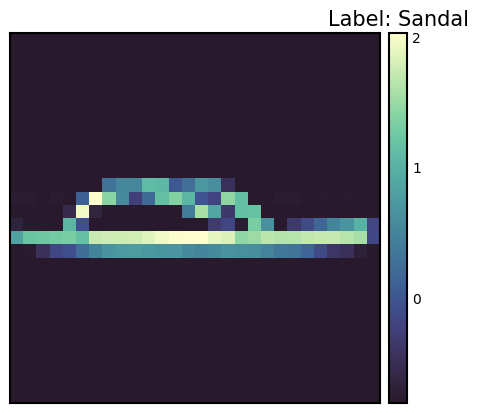

In [11]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Normalize, Compose
import seaborn_image as isns
import matplotlib.pyplot as plt # Added for visualization


# Function to calculate mean and std of the dataset
def calculate_mean_std(dataset):
    dataloader = DataLoader(dataset, batch_size=len(dataset), shuffle=False)
    data, _ = next(iter(dataloader))
    mean = data.mean(axis=(0, 2, 3))  # Calculate mean across channel dimension
    std = data.std(axis=(0, 2, 3))    # Calculate std across channel dimension
    return mean, std


# Datasets.  Note:  We *don't* apply Normalize here yet.
train_dataset = datasets.FashionMNIST(
    root="data", train=True, download=True, transform=ToTensor()
)
test_dataset = datasets.FashionMNIST(
    root="data", train=False, download=True, transform=ToTensor()
)

# Calculate mean and std for normalization
train_mean, train_std = calculate_mean_std(train_dataset)
print(f"Train data mean: {train_mean}, std: {train_std}")

# Now define transforms *with* normalization
transform = Compose([
    ToTensor(),
    Normalize(train_mean, train_std)  # Use calculated mean and std
])

# Re-create datasets with the normalization transform
train_dataset = datasets.FashionMNIST(
    root="data", train=True, download=True, transform=transform
)
test_dataset = datasets.FashionMNIST(
    root="data", train=False, download=True, transform=transform
)


# Check one training data sample.
sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
img, label = train_dataset[sample_idx]  # Use a random index

print(f"Label: {label}")

# Manually create a label map
labels_map = {
    0: "T-shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

print(f"Label map: {labels_map[label]}")

# Plot using seaborn-image.
isns.imgplot(img.squeeze())  # Squeeze to remove channel dimension for grayscale
plt.title(f"Label: {labels_map[label]}") # Add title to plot
plt.show()


# Define data loaders
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False) # No need to shuffle test data


### 3.1.5 数据转换(Transform)

数据转换(Data Transform)是深度学习中非常重要的预处理步骤。自2012年AlexNet取得成功后，数据增强(Data Augmentation)成为提高模型性能的关键因素。PyTorch提供了多种工具来实现这些转换。使用`transforms.Compose`可以顺序应用多个转换。此外，通过`Lambda`函数也可以轻松实现用户自定义的转换。

数据转换对于提高模型的泛化(generalization)性能非常重要。特别是在计算机视觉领域，通过各种转换进行的数据增强已成为标准实践。对于`Normalize`转换来说，为了确保模型训练的稳定性，将数据标准化是一个必要的步骤。

要应用`Normalize`转换，需要知道数据集的均值(mean)和标准差(standard deviation)。计算这些值的代码如下所示。

In [12]:
from torchvision import transforms
import PIL
import torch
from torch.utils.data import DataLoader
from torchvision import datasets

# Calculate mean and std of the dataset
def calculate_mean_std(dataset):
    dataloader = DataLoader(dataset, batch_size=len(dataset), shuffle=False) # Load all data at once
    data, _ = next(iter(dataloader))
    # For grayscale images, calculate mean and std over height, width dimensions (0, 2, 3)
    # For RGB images, the calculation would be over (0, 1, 2)
    mean = data.mean(dim=(0, 2, 3))  # Calculate mean across batch and spatial dimensions
    std = data.std(dim=(0, 2, 3))    # Calculate std across batch and spatial dimensions
    return mean, std

# --- Example usage with FashionMNIST ---
# 1.  Create dataset *without* normalization first:
train_dataset_for_calc = datasets.FashionMNIST(
    root="data", train=True, download=True, transform=transforms.ToTensor()  # Only ToTensor
)

# 2. Calculate mean and std:
train_mean, train_std = calculate_mean_std(train_dataset_for_calc)
print(f"Train data mean: {train_mean}, std: {train_std}")


# 3.  *Now* create the dataset with normalization:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(train_mean, train_std)  # Use calculated mean and std
])

# Example of defining a custom transform using Lambda
def crop_image(image: PIL.Image.Image) -> PIL.Image.Image:
    # Original image is assumed to be 28x28.
    left, top, width, height = 5, 5, 18, 18 # Example crop parameters
    return transforms.functional.crop(image, top=top, left=left, width=width, height=height)

# Compose transforms, including the custom one and normalization.
transform_with_crop = transforms.Compose([
    transforms.Lambda(crop_image), # Custom cropping
    transforms.ColorJitter(),
    transforms.RandomInvert(),
    transforms.ToTensor(), # Must be *before* Normalize
    transforms.Normalize(train_mean, train_std) # Use calculated mean and std
])

train_dataset_transformed = datasets.FashionMNIST(root="data", train=True, download=True, transform=transform_with_crop)
# Get one sample to check the transformation.
sample_img, sample_label = train_dataset_transformed[0]
print(f"Transformed image shape: {sample_img.shape}")
print(f"Transformed image min/max: {sample_img.min()}, {sample_img.max()}") # Check normalization

Train data mean: tensor([0.2860]), std: tensor([0.3530])
Transformed image shape: torch.Size([1, 18, 18])
Transformed image min/max: -0.8102576732635498, 2.022408962249756


在上述代码中，首先生成仅应用了 `ToTensor()` 转换的数据集以计算平均值和标准差。然后，使用计算出的值定义包含 `Normalize` 转换的最终转换。还包括一个示例，该示例使用 `Lambda` 函数将自定义的 `crop_image` 函数添加到转换管道中。`ToTensor()` 必须在 `Normalize` *之前*。`ToTensor()` 将范围为 \[0, 255] 的图像转换为范围为 \[0, 1] 的张量，而 `Normalize` 则将此 \[0, 1] 范围的数据标准化为平均值 0 和标准差 1。数据增强通常只应用于训练数据，而不应用于验证/测试数据。

### 3.1.6 模型

自20世纪80年代以来，神经网络模型的实现方式已经多样化地发展。PyTorch 自2016年推出时就采用了面向对象的模型实现方法，这是通过 `nn.Module` 实现的。这种方法极大地提高了模型的可重用性和扩展性。

模型类是通过继承 `nn.Module` 来实现的，并且通常包含以下方法：

*   `__init__()`: 定义并初始化神经网络的组件（层、激活函数等）。
*   `forward()`: 接收输入数据，执行模型的前向传播运算，并返回输出（对数或预测值）。
*   (可选) `training_step()`、`validation_step()`、`test_step()`：当与 PyTorch Lightning 等库一起使用时，定义每个训练/验证/测试步骤的行为。
*   (可选) 其他用户自定义方法：可以添加执行模型特定功能的方法。

In [13]:
from torch import nn

class SimpleNetwork(nn.Module):
    def __init__(self):
        super().__init__()  # Or super(SimpleNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.network_stack = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)  # Flatten the image data into a 1D array
        logits = self.network_stack(x)
        return logits

# Move model to the appropriate device (CPU or GPU)
model = SimpleNetwork().to(device)
print(model)

SimpleNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (network_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


logit（罗吉特）有几种含义。

*   数学意义: 将 \[0, 1] 范围的概率转换为 \[−∞, ∞] 范围的实数的函数。
*   深度学习中的意义: 未归一化(unnormalized)的神经网络原始输出值。

在多类分类(multi-class classification)问题中，通常在最后应用 `softmax` 函数将输出转换为可以与标签比较的概率值。此时，logit 是 `softmax` 函数的输入值。

模型从类生成并传输到 `device`。如果存在 GPU，则模型会上传到 GPU 内存中。

In [14]:
x = torch.rand(1, 28, 28, device=device)
logits = model(x)  # Don't call forward() directly!  Call the *model* object.
prediction = nn.Softmax(dim=1)(logits)  # Convert logits to probabilities
y_label = prediction.argmax(1) # Get the predicted class

print(f"Logits: {logits}")
print(f"Prediction probabilities: {prediction}")
print(f"Predicted class: {y_label}")

Logits: tensor([[ 0.0464, -0.0368,  0.0447, -0.0640, -0.0253,  0.0242,  0.0378, -0.1139,
          0.0005,  0.0299]], device='cuda:0', grad_fn=<AddmmBackward0>)
Prediction probabilities: tensor([[0.1052, 0.0968, 0.1050, 0.0942, 0.0979, 0.1029, 0.1043, 0.0896, 0.1005,
         0.1035]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Predicted class: tensor([0], device='cuda:0')


需要注意的是，不应直接调用模型的 `forward()` 方法。相反，应该像调用函数一样调用模型对象（`model(x)`），这样会自动执行 `forward()`，并且与 PyTorch 的自动微分系统集成。模型对象的 `__call__` 方法会调用 `forward()` 并执行其他必要操作（如 hook 等）。

### 3.1.7 训练

> **挑战问题**: 如何高效地训练大规模数据集和复杂模型？
>
> **研究者的困扰**: 深度学习模型的性能受数据量和质量，以及模型复杂度的影响很大。但是要训练大规模数据集和复杂模型需要大量的时间和计算资源。稳定训练过程、防止过拟合、找到最佳超参数也是难题。为了解决这些问题，需要有效的学习算法、优化技术，以及自动化的训练循环。

准备好要训练的数据和模型后，进行实际的训练。为了使神经网络模型成为良好的近似器（approximator），必须反复更新参数。定义一个误差函数（loss function）来计算标签和预测值之间的差异，并选择一个优化器（optimizer）以持续更新参数从而减少误差。

训练过程如下：

1. 数据集和数据加载器初始化
2. 按批次加载数据
3. 通过前向传播计算预测值
4. 通过损失函数计算误差
5. 通过反向传播计算梯度
6. 通过优化器更新参数

对整个数据集进行一次遍历称为一个周期（epoch），这种过程重复多个周期即为训练循环。

##### 超参数
训练需要三个关键超参数：

- 周期数：确定要重复多少次周期。通常在过拟合之前停止是最好的。
- 批量大小：每次通过模型的训练数据的数量。将所有数据一次性通过通常是不现实的，因为会受到GPU内存限制和矩阵运算时间指数增长的影响。通过部分数据逐步更新模型参数以接近最优值。如果批量太小，则变化量可能过大，难以接近最小值。
- 学习率：调整要更新值的比例。可以比喻为逐步寻找过程中每一步的步长。通常取较小的值。在下一章中我们将探讨学习率与优化器的关系。

In [15]:
# 3가지 초매개변수
epochs = 10
batch_size = 32
learning_rate = 1e-3 # 최적화기를 위해 앞서 지정했음.

##### 训练循环

训练循环在每个epoch中分为两个阶段进行。
1. 训练阶段：参数优化
2. 验证阶段：性能评估

自2015年批归一化出现后，区分train()和eval()模式变得非常重要。在eval()模式下，通过禁用批归一化或dropout等训练专用操作来提高推理速度。

##### 损失函数

损失函数是神经网络学习的核心要素。自从1943年的McCulloch-Pitts神经元模型之后，提出了各种各样的损失函数。特别是1989年从信息论中借用的交叉熵（Cross-Entropy）的引入成为深度学习发展的重要转折点。

##### 二元交叉熵 (BCE)

在二分类任务中常用的BCE定义如下。

$$\mathcal{L} = - \sum_{i} [y_i \log{x_i} + (1-y_i)\log{(1-x_i)}] $$

其中，$y$是实际标签，$x$是模型的预测值，两者都位于[0, 1]范围内。

PyTorch提供了多种损失函数。

*   `nn.MSELoss`：用于回归问题（均方误差）
*   `nn.NLLLoss`：负对数似然
*   `nn.CrossEntropyLoss`：组合了`LogSoftmax`和`NLLLoss`
*   `nn.BCEWithLogitsLoss`：为了数值稳定性集成了Sigmoid层和BCE

特别值得注意的是`nn.BCEWithLogitsLoss`。它通过集成Sigmoid层和BCE来提高数值稳定性。使用对数函数具有以下优点（在第2章中有更详细的描述）：

1. 缓解急剧的数值变化
2. 将乘法转换为加法以提高计算效率

In [16]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

##### 优化器(Optimizer)

优化算法从1950年代的基本梯度下降法(Gradient Descent)开始，到2014年Adam的出现取得了重大进展。`torch.optim`提供了多种优化器，目前主流的是Adam和AdamW。

In [17]:
# Declare the optimizer.
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Learning rate scheduler (optional, but often beneficial)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)

在上述代码中，我们使用了 `torch.optim.lr_scheduler.StepLR` 添加了学习率调度器。每经过 `step_size` 个epoch，学习率会乘以 `gamma` 进行衰减。学习率调度对学习速度和稳定性有很大影响。

##### 训练循环 (Training Loop)

我们将构建一个训练循环，对数据集进行反复操作。通常情况下，一个 epoch 由训练和验证两部分组成。

1. **训练循环**：使用训练数据集优化参数。
2. **验证循环**：使用测试（验证）数据集检查模型性能的变化。

在训练时，可以将模型的模式设置为 `train` 和 `eval` 两种。这可以看作是一种开关。自2015年批归一化出现后，`train()` 和 `eval()` 模式的区分变得重要起来。在 `eval()` 模式下，会禁用批归一化和 dropout 等训练专用操作以提高推理速度。

In [18]:
from torch.utils.tensorboard import SummaryWriter

# TensorBoard writer setup
writer = SummaryWriter('runs/fashion_mnist_experiment_1')


def train_loop(model, data_loader, loss_fn, optimizer, epoch):  # Added epoch for logging

    model.train()  # Set the model to training mode

    size = len(data_loader.dataset)  # Total number of data samples
    num_batches = len(data_loader)
    total_loss = 0

    for batch_count, (input_data, label_data) in enumerate(data_loader):
        # Move data to the GPU (if available).
        input_data = input_data.to(device)
        label_data = label_data.to(device)

        # Compute predictions
        preds = model(input_data)

        # Compute loss
        loss = loss_fn(preds, label_data)
        total_loss += loss.item()

        # Backpropagation
        loss.backward()  # Perform backpropagation

        # Update parameters
        optimizer.step()
        optimizer.zero_grad()  # Zero the gradients before next iteration

        if batch_count % 100 == 0:
            loss, current = loss.item(), batch_count * batch_size + len(input_data)
            # print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

    avg_train_loss = total_loss / num_batches
    return avg_train_loss


def eval_loop(model, data_loader, loss_fn):
    model.eval()  # Set the model to evaluation mode

    correct, test_loss = 0.0, 0.0

    size = len(data_loader.dataset)  # Total data size
    num_batches = len(data_loader)  # Number of batches

    with torch.no_grad():  # Disable gradient calculation within this block
        for input_data, label_data in data_loader:  # No need for enumerate as count is not used
            # Move data to GPU (if available).
            input_data = input_data.to(device)
            label_data = label_data.to(device)

            # Compute predictions
            preds = model(input_data)

            test_loss += loss_fn(preds, label_data).item()
            correct += (preds.argmax(1) == label_data).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size

    # print(f"\n Test Result \n Accuracy: {(100 * correct):>0.1f}%, Average loss: {test_loss:>8f} \n")
    return test_loss, correct

##### 整个训练过程

整个训练过程在每个epoch中重复训练和验证。使用`tqdm`可视化显示进度，并使用TensorBoard记录学习率变化。

In [19]:
# Progress bar utility
from tqdm.notebook import tqdm

epochs = 5  # Reduced for demonstration
for epoch in tqdm(range(epochs)):
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_loss = train_loop(model, train_dataloader, loss_fn, optimizer, epoch)
    test_loss, correct = eval_loop(model, test_dataloader, loss_fn)

    # Log training and validation metrics to TensorBoard
    writer.add_scalar('Loss/train', train_loss, epoch)
    writer.add_scalar('Loss/test', test_loss, epoch)
    writer.add_scalar('Accuracy/test', correct, epoch)
    writer.add_scalar('Learning Rate', optimizer.param_groups[0]['lr'], epoch) # Log learning rate

    print(f'Epoch: {epoch}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {correct:.2f}%, LR: {optimizer.param_groups[0]["lr"]:.6f}')
    scheduler.step()  # Update learning rate.  Place *after* logging.

print("Done!")
writer.close() # Close TensorBoard Writer

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1
-------------------------------
Epoch: 0, Train Loss: 1.5232, Test Loss: 0.9543, Test Accuracy: 0.71%, LR: 0.001000
Epoch 2
-------------------------------
Epoch: 1, Train Loss: 0.7920, Test Loss: 0.7059, Test Accuracy: 0.76%, LR: 0.001000
Epoch 3
-------------------------------
Epoch: 2, Train Loss: 0.6442, Test Loss: 0.6208, Test Accuracy: 0.78%, LR: 0.001000
Epoch 4
-------------------------------
Epoch: 3, Train Loss: 0.5790, Test Loss: 0.5757, Test Accuracy: 0.79%, LR: 0.001000
Epoch 5
-------------------------------
Epoch: 4, Train Loss: 0.5383, Test Loss: 0.5440, Test Accuracy: 0.80%, LR: 0.001000
Done!


这种训练-验证循环自1990年代以来已成为标准的深度学习训练方法。特别是在验证阶段，它在监控过拟合和决定提前停止（early stopping）方面发挥着重要作用。

### 3.1.8 模型保存、读取

模型保存是深度学习实践中非常重要的一部分。可以将训练好的模型保存，然后在需要时重新加载以供再利用，或者部署到其他环境（例如：服务器、移动设备）中。PyTorch 提供了两种主要的保存方式。

##### 仅保存权重

模型的训练参数（权重和偏置）存储在一个称为 `state_dict` 的 Python 字典中。`state_dict` 是一个将每一层（layer）映射到该层参数张量的结构。这种方式的优点是，即使模型结构发生变化，也可以加载权重，因此通常推荐使用。

In [37]:
# Save model weights
torch.save(model.state_dict(), 'model_weights.pth')

# Load weights
model_saved_weights = SimpleNetwork()  # Create an empty model with the same architecture
model_saved_weights.load_state_dict(torch.load('model_weights.pth'))
model_saved_weights.to(device) # Don't forget to move to the correct device!
model_saved_weights.eval() # Set to evaluation mode

# Check performance (assuming eval_loop is defined)
eval_loop(model_saved_weights, test_dataloader, loss_fn)

/tmp/ipykernel_112013/3522135054.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_saved_weights.load_state_dict(torch.load('model_weights.pth'))


(0.5459668265935331, 0.8036)

##### 整个模型保存

自2018年以来，随着模型架构变得更加复杂，也开始采用同时保存模型结构和权重的方法。

In [38]:
torch.save(model, 'model_trained.pth')

# Load the entire model
model_saved = torch.load('model_trained.pth')
model_saved.to(device)  # Move the loaded model to the correct device.
model_saved.eval() #  Set the loaded model to evaluation mode

# Check performance
eval_loop(model_saved, test_dataloader, loss_fn)

/tmp/ipykernel_112013/3185686172.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_saved = torch.load('model_trained.pth')


(0.5459668265935331, 0.8036)

整个模型保存方式虽然方便，但如果模型类定义发生变化时可能会出现兼容性问题。特别是在生产环境中，模型架构不经常更改，因此仅保存权重的方式可能更加稳定。此外，整个模型的保存方式使用了Python的`pickle`模块，而`pickle`存在可以执行任意代码的安全漏洞，因此可能存在安全风险。

##### Safetensors: 更安全的替代方案

近年来，出现了像`safetensors`这样的新存储格式，以提高安全性和加载速度。`safetensors`是一种用于安全高效地存储张量数据的格式。

*   **安全性:** `safetensors`不允许执行任意代码，因此比`pickle`更安全。
*   **零复制:** 通过直接将数据映射到内存而无需复制，从而加快加载速度。
*   **惰性加载:** 只加载所需部分，减少内存使用量。
*   **支持多种框架**: PyTorch, TensorFlow, JAX 等

In [39]:
# Install safetensors: pip install safetensors

from safetensors.torch import save_file, load_file

# Save using safetensors
state_dict = model.state_dict()
save_file(state_dict, "model_weights.safetensors")

# Load using safetensors
loaded_state_dict = load_file("model_weights.safetensors", device=device) # Load directly to the device.
model_new = SimpleNetwork().to(device) # Create an instance of your model class
model_new.load_state_dict(loaded_state_dict)
model_new.eval()

# Check performance
eval_loop(model_new, test_dataloader, loss_fn)


(0.5459668265935331, 0.8036)

## 3.2 张量板 

张量板是记录、跟踪和高效可视化在深度学习训练中生成的各种日志的工具。它是一种常见的被称为仪表盘的日志数据记录/可视化工具。最初为TensorFlow开发，但现在已与PyTorch整合。类似于张量板的仪表盘形式的可视化工具有以下几种。

- Weights & Biases (WandB): 基于云的MLOps集成平台，提供广泛的实验跟踪、数据集版本管理、模型管理等功能。其团队协作功能特别出色，在企业环境中广泛使用。
- Vertex AI: Google Cloud提供的完全托管ML工具，提供与BigQuery、Dataproc、Spark的原生集成。可以快速进行模型构建、部署和扩展，适合大规模ML工作流。
- MLflow: 提供实验跟踪、模型打包、中央注册表等的开源工具。简化了ML模型的跟踪和部署，在数据科学及ML领域广泛使用。

除了上述三种工具外，还有许多其他工具。这里主要将使用张量板。

### 3.2.1 张量板基本用法

张量板于2015年与TensorFlow一同出现。当时深度学习模型的复杂性急剧增加，有效监控训练过程的需求变得突出。 

张量板的核心功能包括：
1. 标量指标跟踪：记录损失值、准确率等数值
2. 模型结构可视化：计算图的图形化表示
3. 分布跟踪：观察权重、梯度的分布变化
4. 嵌入投影：高维向量的2D/3D可视化
5. 超参数优化：比较不同设置的实验结果

张量板是用于可视化和分析深度学习训练过程的强大工具。使用张量板的基本步骤主要分为安装、设置日志目录、设置回调三个阶段。

##### 安装方法

可以通过pip或conda安装张量板。

In [ ]:
!pip install tensorboard
# 또는
!conda install -c conda-forge tensorboard

##### 日志目录设置

TensorBoard 读取存储在日志目录中的事件文件以进行可视化。在 Jupyter 笔记本或 Colab 中，可以如下设置。

In [41]:
from torch.utils.tensorboard import SummaryWriter

# 로그 디렉토리 설정
log_dir = 'logs/experiment_1'
writer = SummaryWriter(log_dir)

##### TensorBoard运行

TensorBoard可以通过以下两种方式启动。

1. 在命令行中运行

In [ ]:
tensorboard --logdir=logs

2. 在Jupyter笔记本中运行

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=logs

执行后，在网页浏览器中访问 http://localhost:6006 即可查看 TensorBoard 仪表板。

##### 在远程服务器上运行

在远程服务器上运行 TensorBoard 时，使用 SSH 隧道。

In [ ]:
ssh -L 6006:127.0.0.1:6006 username@server_ip

`SummaryWriter` 是生成记录在 TensorBoard 中的数据的核心类。主要参数如下：

*   `log_dir`: 日志文件存储的目录路径。
*   `comment`: 附加到 `log_dir` 的字符串。
*   `flush_secs`: 将日志写入磁盘的时间间隔（秒）。
*   `max_queue`: 设置保留多少待处理的事件/步骤。

**主要方法 (SummaryWriter)**

*   `add_scalar(tag, scalar_value, global_step=None)`: 记录标量值（如：损失、准确率）。
*   `add_histogram(tag, values, global_step=None, bins='tensorflow')`: 记录直方图（值的分布）。
*   `add_image(tag, img_tensor, global_step=None, dataformats='CHW')`: 记录图像。
*   `add_figure(tag, figure, global_step=None, close=True)`: 记录 Matplotlib 图形。
*   `add_video(tag, vid_tensor, global_step=None, fps=4, dataformats='NCHW')`: 记录视频。
*   `add_audio(tag, snd_tensor, global_step=None, sample_rate=44100)`: 记录音频。
*   `add_text(tag, text_string, global_step=None)`: 记录文本。
*   `add_graph(model, input_to_model=None, verbose=False)`: 记录模型图。
*   `add_embedding(mat, metadata=None, label_img=None, global_step=None, tag='default', metadata_header=None)`: 记录嵌入投影仪。
*   `add_hparams(hparam_dict, metric_dict, hparam_domain_discrete=None, run_name=None)`: 记录超参数及其对应指标。
*   `flush()`: 将所有待处理的事件记录到磁盘。
*   `close()`: 结束日志并释放资源。

**主要回调参数 (TensorFlow/Keras)**

在 TensorFlow/Keras 中使用 TensorBoard 时，使用 `tf.keras.callbacks.TensorBoard` 回调。主要参数如下：

*   `log_dir`: 日志存储位置。
*   `histogram_freq`: 计算直方图的频率（0 表示不计算）。用于可视化权重、偏置和激活值的分布。
*   `write_graph`: 是否可视化模型图。
*   `write_images`: 是否以图像形式可视化模型权重。
*   `update_freq`: 记录损失和指标的频率（'batch', 'epoch' 或整数）。
*   `profile_batch`: 指定要配置文件化的批次范围（例如：`profile_batch='5, 8'`）。配置文件化有助于查找性能瓶颈。
*   `embeddings_freq`: 可视化嵌入层的频率。
*   `embeddings_metadata`: 嵌入元数据文件路径。

### 3.2.2 张量板的主要可视化功能

张量板可以可视化模型训练过程中产生的各种指标。主要的可视化仪表盘包括标量、直方图、分布、图形、嵌入等。

##### 标量指标可视化
标量仪表盘用于可视化损失值、准确度等数值型指标的变化。可以跟踪学习率、梯度范数、各层权重的均值/方差等模型训练过程中的各种统计值。还可以监控最新的生成模型中重要的FID(Fréchet Inception Distance)分数或QICE(Quantile Interval Coverage Error)等质量评估指标。通过这些指标，可以实时监控模型的训练进度，并及早发现过拟合或训练不稳定性等问题。标量值可以如下记录。

In [ ]:
writer.add_scalar('Loss/train', train_loss, step)
writer.add_scalar('Accuracy/train', train_acc, step)
writer.add_scalar('Learning/learning_rate', current_lr, step)
writer.add_scalar('Gradients/norm', grad_norm, step)
writer.add_scalar('Quality/fid_score', fid_score, step)
writer.add_scalar('Metrics/qice', qice_value, step)

##### 直方图和分布可视化
可以观察权重和偏置的分布变化。直方图通过直观展示每层的权重、偏置、梯度、激活值的分布，有助于理解模型的内部状态。特别是在训练过程中，可以及早发现权重饱和于特定值或梯度消失/爆炸的问题，对模型调试非常有用。可以如下记录直方图。

In [ ]:
for name, param in model.named_parameters():
    writer.add_histogram(f'Parameters/{name}', param.data, global_step)
    if param.grad is not None:
        writer.add_histogram(f'Gradients/{name}', param.grad, global_step)

##### 模型结构可视化
可以直观地查看模型的结构。特别是可以直观地理解复杂神经网络的层次结构和连接。TensorBoard 通过计算图以图形形式表示数据流、各层的输入输出形状、运算顺序等，并且可以通过扩展每个节点来审查详细信息。近年来，对于 Transformer 和 Diffusion 模型中复杂的注意力机制、交叉注意层、条件分支结构等的可视化特别有用。这对于模型调试和优化非常有帮助，尤其是对于包含跳跃连接或并行结构的复杂架构的理解。可以如下记录模型图。

In [ ]:
writer.add_graph(model, input_to_model)

##### 嵌入可视化
使用 TensorBoard 的 Projector 可以将高维嵌入投影到 2D 或 3D 空间进行可视化。这有助于分析词嵌入或图像特征向量之间的关系。通过 PCA 或 UMAP 等降维技术，可以在保留复杂高维数据的聚类结构和相对距离的同时进行可视化。特别是 UMAP 可以在保持局部结构和全局结构的同时实现快速可视化。通过这种方式，可以查看具有相似特征的数据点如何聚类，以及类之间的区分是否明确，并且可以跟踪学习过程中特征空间的变化。如下所示记录嵌入。

In [ ]:
writer.add_embedding(
    features,
    metadata=labels,
    label_img=images,
    global_step=step
)


##### 超参数可视化
可以可视化超参数调优的结果。除了学习率、批大小和 dropout 比例外，还可以分析 Transformer 模型的注意力头数、提示长度、token 嵌入维度等结构参数的影响。最新的 LLM 或扩散模型中重要的噪声调度、采样步数、CFG（无分类器引导）权重等推理参数也可以一起可视化。通过并行坐标图或散点图表示不同超参数组合下的模型性能，有助于找到最佳配置。特别是可以一目了然地比较多个实验结果，便于分析超参数之间的相互作用对模型性能的影响。如下可以记录超参数及相关指标。

In [ ]:
writer.add_hparams(
    {
        'lr': learning_rate, 
        'batch_size': batch_size, 
        'num_heads': n_heads,
        'cfg_scale': guidance_scale,
        'sampling_steps': num_steps,
        'prompt_length': max_length
    },
    {
        'accuracy': accuracy, 
        'loss': final_loss,
        'fid_score': fid_score
    }
)

##### 图像可视化
在学习过程中可以可视化生成的图像或中间特征图。通过可视化卷积层的滤波器和激活图，可以直观地理解模型正在学习哪些特征，并且可以查看每一层关注输入图像的哪一部分。特别是在像Stable Diffusion和DALL-E这样的最新生成模型中，可以通过视觉追踪生成图像的质量变化，这非常有用。随着混合模型的出现，更加精细和逼真的图像生成成为可能。可以如下记录图像。

In [ ]:
# 입력 이미지나 생성된 이미지 시각화
writer.add_images('Images/generated', generated_images, global_step)

# 디퓨전 모델의 중간 생성 과정 시각화
writer.add_images('Diffusion/steps', diffusion_steps, global_step)

# 어텐션 맵 시각화
writer.add_image('Attention/maps', attention_visualization, global_step)

通过TensorBoard的可视化功能，可以直观地理解模型的学习过程并快速发现问题。特别是可以实时监控学习进度，这对于早期停止训练或调整超参数非常有用。嵌入式可视化对于理解高维数据的关系尤其有用，并且有助于分析模型所学特征空间的结构。

### 3.2.3 张量板示例

在本节中，我们将详细探讨如何将前面讨论的张量板的各种功能应用于实际的深度学习模型训练。使用MNIST手写数字数据集训练一个简单的CNN（卷积神经网络）模型，并逐步说明如何通过张量板可视化训练过程中产生的主要指标和数据。

**核心可视化元素:**

| 可视化类型          | 可视化内容                                                                                           | 张量板标签 |
| :------------------- | :--------------------------------------------------------------------------------------------------- | :---------- |
| **标量指标**     | 训练/测试损失(loss)，训练/测试准确度(accuracy)，学习率(learning rate)，梯度范数(norm) | SCALARS     |
| **直方图/分布**   | 所有层的权重(weight)分布，所有层的梯度(gradient)分布                          | DISTRIBUTIONS, HISTOGRAMS |
| **模型结构**       | MNIST CNN 模型的计算图(computational graph)                                                       | GRAPHS      |
| **特征图**         | Conv1 层特征图，Conv2 层特征图，输入图像网格，Conv1 过滤器可视化                        | IMAGES      |
| **嵌入**          | FC1 层的32维特征向量，使用t-SNE进行的2D可视化，MNIST图像标签                            | PROJECTOR   |
| **超参数**   | 批次大小，学习率，dropout比率，优化器类型，权重衰减，动量，调度器步长/gamma       | HPARAMS     |

**可视化周期:**

*   标量/直方图: 每50个批次(batch)
*   特征图/图像: 每50个批次
*   嵌入: 每个纪元(epoch)结束时
*   超参数: 训练开始和结束时

代码示例

此示例使用 `dld` 包。导入所需的模块并开始训练。`train()` 函数使用默认超参数对 MNIST 数据集进行 CNN 模型的训练，并将训练过程记录到 TensorBoard 中。如果要尝试其他超参数，可以向 `train()` 函数传递 `hparams_dict` 参数。

In [ ]:
# In a notebook cell:
from dldna.chapter_03.train import train

# Run with default hyperparameters
train()

# Run with custom hyperparameters
my_hparams = {
    'batch_size': 128,
    'learning_rate': 0.01,
    'epochs': 8,
}
train(hparams_dict=my_hparams, log_dir='runs/my_custom_run')

# Start TensorBoard (in a separate cell, or from the command line)
# %load_ext tensorboard
# %tensorboard --logdir runs

**TensorBoard 运行:**

训练完成后，在 shell 中使用以下命令运行 TensorBoard。

In [ ]:

tensorboard --logdir runs

在网页浏览器中访问 `http://localhost:6006` 可以查看 TensorBoard 仪表板。

可以确认每个项目分别生成了多个卡片。
![TensorBoard](../../../assets/images/03_01.png)

可以在各个项目中查看单个值的变化、图像等。
![TensorBoard](../../../assets/images/03_02.png)


**使用 TensorBoard 仪表板**

*   **SCALARS 标签页:** 跟踪训练/测试损失、准确度、学习率等随时间的变化。这有助于了解模型是否训练良好，是否存在过拟合(overfitting)等问题。
*   **GRAPHS 标签页:** 可视化模型的计算图，直观展示数据流和运算过程。这对于理解复杂模型的结构非常有帮助。
*    **DISTRIBUTIONS/HISTOGRAMS 标签页:** 可视化权重和梯度的分布。这有助于诊断权重初始化是否恰当、是否存在梯度消失(vanishing gradients)或梯度爆炸(exploding gradients)等问题。
*   **IMAGES 标签页:** 以图像形式可视化输入图像、特征图、滤波器等。这可以直观地查看模型关注图像的哪些部分，特征提取是否有效等。
*   **PROJECTOR 标签页:** 将高维嵌入投影到 2D/3D 并进行可视化。这有助于了解数据的聚类、异常值(outlier)等问题。
*   **HPARAMS 标签页:** 比较使用不同超参数组合实验的结果，帮助找到最优设置。

在本例中，我们探讨了如何使用 TensorBoard 可视化深度学习模型的训练过程。TensorBoard 不仅仅是一个简单的可视化工具，它对于理解模型的工作方式、诊断问题以及改进性能都是必不可少的。

## 3.3 Hugging Face Transformers

Hugging Face 是一家由法国企业家于2016年创立的公司，最初是一个面向青少年的聊天机器人应用。起初的目标是提供情感支持和娱乐的人工智能朋友，但当他们将自家聊天机器人的NLP模型开源时，迎来了一个重要的转折点。这发生在BERT、GPT等高性能语言模型出现但仍难以实际应用的时期，因此引起了巨大反响。2019年推出的Transformers库为自然语言处理领域带来了革命性的变化。如果说PyTorch提供了深度学习的基础运算和学习框架，那么Hugging Face则在此基础上专注于实现和利用真实的语言模型。特别是通过简化预训练模型的共享和重用，使大规模语言模型不再只是少数大企业的专属，而是任何人都可以使用。

Hugging Face 构建了一个开放的生态系统，被称为“AI 的 GitHub”。目前已有超过100万个模型和数十万的数据集被分享，这不仅超越了单纯的代码仓库，还发展成为一个促进道德和负责任的AI开发的平台。特别是通过引入模型卡系统来明确每个模型的局限性和偏差，并通过基于社区的反馈系统持续验证模型的质量和伦理性。这些努力不仅促进了AI开发的民主化，更提出了一个负责的技术发展的新范式。Hugging Face 的方法平衡了技术创新与伦理考虑，已成为现代AI开发的最佳实践之一。

### 3.3.1 Transformers库介绍

Transformers 提供了一个集成接口，可以轻松下载和使用预训练模型。它可以在PyTorch或TensorFlow等框架上运行，确保与现有深度学习生态系统的兼容性。特别是支持像JAX这样的新框架，扩大了研究人员的选择范围。Transformers 的核心组成部分主要有两个。

##### 模型中心和管道

模型中心充当预训练模型的中央存储库。公开了专门用于文本生成、分类、翻译、摘要、问答等多种自然语言处理任务的模型。每个模型都附带详细的元数据，如性能指标、许可信息、学习数据来源等。特别是通过模型卡（Model Card）系统明确指出模型的局限性和偏差，鼓励负责任的AI开发。

管道将复杂的预处理和后处理过程抽象化，提供简单易用的接口。这在生产环境中尤其有用，并大大降低了模型集成的成本。管道内部自动配置分词器和模型，并自动执行批处理或GPU加速等优化操作。

In [ ]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
result = classifier("I love this book!")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


##### 分词器和模型类

分词器将输入文本转换为模型可以处理的数字序列。每个模型都有专用的分词器，这反映了训练数据的特性。分词器不仅进行简单的单词分割，还能一致地处理子词分词、添加特殊标记、填充、截断等复杂的预处理任务。特别是，它综合支持WordPiece、BPE、SentencePiece等多种分词算法，可以选择最适合每种语言和领域的最佳分词方法。

模型类实现了执行实际计算的神经网络。支持BERT、GPT、T5等各种架构，并且可以通过AutoModel系列类自动选择模型的架构。每个模型都附带预训练权重，并可根据需要针对特定任务进行微调。此外，还可以立即应用模型并行化、量化、剪枝等优化技术。

In [43]:
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

### 3.3.2 主要应用案例

Transformers 库在各种自然语言处理任务中得到了广泛应用。自 2020 年以来，随着 GPT 系列模型的发展，文本生成能力取得了飞跃性的进步，到 2024 年，Llama 3 这样的高性能开源模型的出现进一步扩展了应用范围。特别是 Llama 3 的 405B 参数模型展现出与 GPT-4 媲美的性能，在多语言处理、编程和推理能力方面取得了显著进展。这些进步使得在实际业务环境中可以实现各种应用，如客户服务、内容生成、数据分析、自动化任务处理等广泛领域都在使用。特别是代码生成和调试能力的大幅提升也为提高开发者生产力做出了贡献。

**Hugging Face Hub 的使用:**

Hugging Face Hub ([https://huggingface.co/models](https://huggingface.co/models)) 是一个可以搜索、过滤和下载众多模型和数据集的平台。

*   **模型搜索:**  可以在左上角的搜索框中通过模型名称（如 "bert", "gpt2", "t5"）或任务（如 "text-classification", "question-answering"）进行搜索。
*   **过滤:**  在左侧面板中可以根据任务(Task)、库(Libraries)、语言(Languages)、数据集(Datasets)等不同标准进行过滤。
*   **模型页面:** 每个模型页面提供了模型描述、使用示例、性能指标、模型卡等有用信息。

**文本生成与分类**

文本生成是在给定提示的基础上生成自然文本的任务。最新的模型提供了以下高级功能：
- 多模态生成：结合文本和图像的内容生成
- 代码自动生成：针对不同编程语言优化的代码编写
- 对话型代理：实现理解上下文的智能聊天机器人
- 专业领域文本：生成医疗、法律等特殊领域的文档

In [ ]:
from transformers import pipeline

# Text generation pipeline (using gpt2 model)
generator = pipeline('text-generation', model='gpt2')  # Smaller model
result = generator("Design a webpage that", max_length=50, num_return_sequences=1)
print(result[0]['generated_text'])


Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Design a webpage that is compatible with your browser with our FREE SEO Service.

You read that right. By utilizing a web browser's default settings, your webpage should be free from advertisements and other types of spam. The best way to avoid this


文本分类在2025年将更加精细，提供以下功能：

- 零样本/少样本学习：通过Hugging Face的Transformer库可以实现对新类别的即时适应。特别是基于自然语言推理的预训练模型仅需不到8个示例即可达到90%以上的准确度，并可应用于多种领域。
- 多语种分类：如Hugging Face的ModernBERT等最新的多语种模型支持16种以上的主要语言。尤其是拥有1.5亿参数的基础模型也达到了80%以上的F1分数，在低资源语言中表现出色。
- 层次分类：Hugging Face的HiGen框架提供了专门针对层次标签分类的功能。通过基于级别的损失函数，可以有效地捕捉文本与标签之间的语义关系，特别是在数据不足的类别中也能表现出高效率。
- 实时分类：通过Hugging Face管道可以实现实时处理流数据。集成优化技术如Flash Attention可高效处理长序列，并在实时应用中提供高吞吐量。

##### 微调和模型共享

Hugging Face集成了最新的微调技术，支持大规模语言模型的高效学习。这些技术可以在保持模型性能的同时大幅减少学习成本和时间。

- QLoRA (量化低秩适应)：通过Hugging Face的PEFT库提供，结合4位量化和低秩适应可将内存使用量减少90%以上。特别是650亿参数模型也可以在单个48GB GPU上进行微调。
- Spectrum：与Hugging Face TRL库集成的选择性层优化技术。通过分析各层的信噪比，仅选择重要度高的层进行学习，从而提高计算效率。
- Flash Attention：从Hugging Face Transformer 2.2版本开始默认支持，并可以通过设置attn_implementation="flash_attention_2"参数轻松激活。特别在处理长序列时内存效率显著提升。
- DeepSpeed：通过Hugging Face Accelerate库完美集成，并通过ZeRO优化器高效支持大规模分布式学习。尤其在推理时也可使用，可以将大模型分布在多个GPU上加载。

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, TrainingArguments, Trainer, DataCollatorWithPadding
from datasets import Dataset
import torch
import numpy as np

# --- 1. Load a pre-trained model and tokenizer ---
model_name = "distilbert-base-uncased"  # Use a small, fast model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)  # Binary classification

# --- 2. Create a simple dataset (for demonstration) ---
raw_data = {
    "text": [
        "This is a positive example!",
        "This is a negative example.",
        "Another positive one.",
        "And a negative one."
    ],
    "label": [1, 0, 1, 0],  # 1 for positive, 0 for negative
}
dataset = Dataset.from_dict(raw_data)

# --- 3. Tokenize the dataset ---
def tokenize_function(examples):
    return tokenizer(examples["text"], truncation=True) #padding is handled by data collator

tokenized_dataset = dataset.map(tokenize_function, batched=True)
tokenized_dataset = tokenized_dataset.remove_columns(["text"]) # remove text, keep label

# --- 4. Data Collator (for dynamic padding) ---
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# --- 5. Training Arguments ---
fp16_enabled = False
if torch.cuda.is_available():
    try:
        if torch.cuda.get_device_capability()[0] >= 7:
            fp16_enabled = True
    except:
        pass

training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=1,          # Keep it short
    per_device_train_batch_size=2,  # Small batch size
    logging_steps=1,           # Log every step
    save_strategy="no",         # No saving
    report_to="none",          # No reporting
    fp16=fp16_enabled,  # Use fp16 if avail.
    # --- Optimization techniques (demonstration) ---
    # gradient_checkpointing=True,  # Enable gradient checkpointing (if needed for large models)
    # gradient_accumulation_steps=2, # Increase effective batch size
)


# --- 6. Trainer ---
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset,
    # eval_dataset=...,  # Add an eval dataset if you have one
    data_collator=data_collator,  # Use the data collator
    # optimizers=(optimizer, scheduler) # you could also customize optimizer
)

# --- 7. Train ---
print("Starting training...")
trainer.train()
print("Training finished!")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

Starting training...


/home/sean/anaconda3/envs/DL/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss
1,0.667500


Training finished!


模型共享生态系统目前支持以下最新功能，截至2025年：
- 模型卡片自动生成：Hugging Face 的自动化模型卡片系统可以自动分析和记录性能指标和偏见。特别是通过 Model Card Toolkit，可以以标准化格式清晰地描述模型的特性和局限性。
- 版本管理：通过 Hugging Face Hub 基于 Git 的版本管理系统，可以跟踪模型的变更历史和性能变化。可以自动生成并比较每个版本的性能度量和参数变化。
- 协作工具：提供与 Hugging Face Spaces 集成的协作环境。团队成员可以在实时共享模型开发、测试和部署过程，并互相给予反馈，同时支持与 CI/CD 管道的集成。
- 伦理 AI：通过 Hugging Face 的伦理 AI 框架，可以自动验证和评估模型的偏见。特别是可以分析不同人口统计群体之间的性能差异，并提前识别潜在风险。

## 练习题

**1. 基础问题**

  * 解释PyTorch张量和NumPy数组的区别以及相互转换的方法。
  * 解释`torch.nn.Linear`层的作用和权重初始化方法。
  * 解释在PyTorch中自动微分(automatic differentiation)是如何工作的，并解释`requires_grad`属性的作用。

**2. 应用问题**

  * 使用`torch.utils.data.Dataset`和`torch.utils.data.DataLoader`将给定的数据集分为训练/验证/测试集，并编写代码以批处理方式加载数据。
  * 继承`nn.Module`实现一个简单的CNN模型（例如：LeNet-5），并使用`torchsummary`检查模型的结构和参数数量。
  * 使用MNIST或Fashion-MNIST数据集训练模型，并使用TensorBoard可视化训练过程（损失、准确率等）。

**3. 深化问题**

  * 使用`torch.einsum`实现矩阵乘法、转置、批处理矩阵乘法、双线性变换(bilinear transformation)等。（提供每种操作的爱因斯坦符号表示，并用PyTorch代码实现。）
  * 编写代码创建自定义数据集并使用`torchvision.transforms`进行数据增强（例如：图像旋转、裁剪、颜色转换等）。
  * 解释如何使用`torch.autograd.grad`计算高阶导数(higher-order derivatives)，并编写一个简单的示例代码。（例如：海森矩阵计算）
  * 解释为什么在不直接调用`torch.nn.Module`的`forward()`方法的情况下，可以像函数一样调用模型对象。（提示：`__call__`方法与自动微分系统的关联）

::: {.callout-note collapse="true" title="点击查看内容（答案）"}
## 练习题解答

### 1. 基础问题解答

1.  **张量 vs. NumPy 数组:**
    *   **区别:** 张量支持 GPU 加速、自动求导。NumPy 是基于 CPU 的通用数组运算。
    *   **转换:** `torch.from_numpy()`, `.numpy()`（注意，GPU 张量需要先调用 `.cpu()`）。

    ```python
    # 示例
    import torch
    import numpy as np
    numpy_array = np.array([1, 2, 3])
    torch_tensor = torch.from_numpy(numpy_array)  # 或者使用 torch.tensor()
    numpy_back = torch_tensor.cpu().numpy()
    ```
2.  **`nn.Linear`:**
    *   **作用:** `y = xW^T + b`（线性变换）。对输入 `x` 进行权重 `W` 的乘法并加上偏置 `b`。
    *   **初始化:** 默认使用 Kaiming He 初始化（均匀分布）。可以通过 `torch.nn.init` 模块进行更改。

    ```python
    # 示例
    import torch.nn as nn
    import torch.nn.init as init
    linear_layer = nn.Linear(in_features=10, out_features=5)
    init.xavier_uniform_(linear_layer.weight) # Xavier 初始化
    ```

3.  **自动求导 (Autograd):**
    *   **工作原理:** 当 `requires_grad=True` 的张量进行运算时，会生成计算图。调用 `.backward()` 时，通过链式法则计算梯度。
    *   **`requires_grad`:** 设置是否进行梯度计算及跟踪。

    ```python
    # 示例
    import torch
    x = torch.tensor([2.0], requires_grad=True)
    y = x**2 + 3*x + 1
    y.backward()
    print(x.grad)  # 输出: tensor([7.])
    ```

### 2. 应用问题解答

4.  **`Dataset`, `DataLoader`:**

    ```python
    from torch.utils.data import Dataset, DataLoader, random_split
    import torchvision.transforms as transforms
    from torchvision import datasets

    # 自定义 Dataset（示例）
    class CustomDataset(Dataset):
        def __init__(self, data, targets, transform=None):
            self.data = data
            self.targets = targets
            self.transform = transform
        def __len__(self):
            return len(self.data)
        def __getitem__(self, idx):
            sample, label = self.data[idx], self.targets[idx]
            if self.transform:
                sample = self.transform(sample)
            return sample, label
    ```
# MNIST DataLoader 示例 (使用 torchvision)
transform = transforms.ToTensor() # 将图像数据转换为张量
mnist_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_size = int(0.8 * len(mnist_dataset))
val_size = len(mnist_dataset) - train_size
train_dataset, val_dataset = random_split(mnist_dataset, [train_size, val_size])
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

```

5.  **LeNet-5, `torchsummary`, TensorBoard:** (完整代码请参见之前的回答，这里只展示核心部分)

```python
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
from torch.utils.tensorboard import SummaryWriter

# LeNet-5 模型
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2)
        self.pool1 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1)
        self.pool2 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = LeNet5()
summary(model, input_size=(1, 28, 28)) # 模型结构摘要

# ... (训练代码，请参见之前的回答) ...

writer = SummaryWriter() # TensorBoard
# ... (在训练中使用 writer.add_scalar() 等进行记录) ...
writer.close()
```

### 3. 进阶问题解答

6.  **`torch.einsum`:**

```python
import torch
```
A = torch.randn(3, 4)
B = torch.randn(4, 5)
C = torch.einsum("ij,jk->ik", A, B)   # 矩阵乘法
D = torch.einsum("ij->ji", A)        # 转置
E = torch.einsum("bi,bj,ijk->bk", A, B, torch.randn(2,3,4))  # 双线性变换
```

7. **自定义数据集，数据增强:**

```python
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image
import os

class CustomImageDataset(Dataset): # 继承自Dataset
    def __init__(self, root_dir, transform=None):
        # ... (构造函数实现) ...
        pass
    def __len__(self):
        # ... (返回数据数量) ...
        pass
    def __getitem__(self, idx):
        # ... (返回对应idx的样本) ...
        pass

# 数据增强
transform = transforms.Compose([
    transforms.RandomResizedCrop(224),  # 随机大小和比例裁剪
    transforms.RandomHorizontalFlip(),     # 水平翻转
    transforms.ToTensor(),              # 转换为张量
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # 标准化
])

# dataset = CustomImageDataset(root_dir='path/to/images', transform=transform)
```

8. **高阶函数:**

```python
import torch

x = torch.tensor(2.0, requires_grad=True)
y = x**3

# 一阶导数
first_derivative = torch.autograd.grad(y, x, create_graph=True)[0]  # create_graph=True
print(first_derivative)

# 二阶导数 (海森矩阵)
second_derivative = torch.autograd.grad(first_derivative, x)[0]
print(second_derivative)
```

9. **`__call__` 方法:**

`nn.Module` 的 `__call__` 方法在调用 `forward()` *前后* 执行额外的操作（如挂钩注册、自动求导相关设置等）。如果直接调用 `forward()`，这些功能将被忽略，可能导致梯度计算不正确或模型的其他功能（例如：`nn.Module` 的 `training` 属性设置）无法正常工作。因此，必须像调用函数一样调用模型对象 (`model(input)`)。
:::

**参考资料**

1.  **PyTorch官方教程:** [https://pytorch.org/tutorials/](https://www.google.com/url?sa=E&source=gmail&q=https://pytorch.org/tutorials/)
2.  **使用PyTorch进行深度学习 (Stevens, Antiga, Viehmann, 2020):** [https://pytorch.org/deep-learning-with-pytorch](https://www.google.com/search?q=https://pytorch.org/deep-learning-with-pytorch)
3.  **编程PyTorch进行深度学习 (Delugach, 2023):** [https://www.oreilly.com/library/view/programming-pytorch-for/9781098142481/](https://www.google.com/search?q=https://www.oreilly.com/library/view/programming-pytorch-for/9781098142481/)
4.  **PyTorch菜谱 (Kalyan, 2019):** [https://pytorch.org/tutorials/recipes/recipes\_index.html](https://www.google.com/url?sa=E&source=gmail&q=https://pytorch.org/tutorials/recipes/recipes_index.html)
5.  **理解训练深层前馈神经网络的难度 (Glorot & Bengio, 2010):** [http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf)
6.  **Fastai库:** [https://docs.fast.ai/](https://www.google.com/url?sa=E&source=gmail&q=https://docs.fast.ai/)
7.  **PyTorch Lightning:** [https://www.pytorchlightning.ai/](https://www.google.com/url?sa=E&source=gmail&q=https://www.pytorchlightning.ai/)
8.  **Hugging Face Transformers文档:** [https://huggingface.co/docs/transformers/index](https://www.google.com/url?sa=E&source=gmail&q=https://huggingface.co/docs/transformers/index)
9.  **TensorBoard文档:** [https://www.tensorflow.org/tensorboard](https://www.google.com/url?sa=E&source=gmail&q=https://www.tensorflow.org/tensorboard)
10. **Weights & Biases文档:** [https://docs.wandb.ai/](https://www.google.com/url?sa=E&source=gmail&q=https://docs.wandb.ai/)